## libraries

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import math

## set some parameters

In [2]:
learning_rate = 1*1e-5
train_batch_size = 128
test_batch_size = 128
print_loss_aft_iter_in_optimize = 10000
prob_2_dig_sel = 10
save_model_after_iter = 20000
max_seq = 5  ####### Maximum number of digits in the dataset
percentage_training_data = 0.75

keep_prob_dropout_dig_1 = .1
keep_prob_dropout_dig_2 = .1
keep_prob_dropout_dig_3 = .1
keep_prob_dropout_dig_4 = .1
keep_prob_dropout_dig_5 = .1

data_set_size = 20000

# Support Functions

In [3]:
# function for one hot encoding
def label_generator(class_numbers, num_classes_per_digit, max_digit = None):     
        
    if max_digit is None:
        temp = np.max(class_numbers)
        #print (temp)
        max_digit = int(math.log10(temp)) + 1 
        #print (max_digit)
        
    labels = np.zeros((len(class_numbers), num_classes_per_digit*max_digit), dtype=np.float)
    for i in range(len(class_numbers)):
        dig = len(str(class_numbers[i]))
        #print (dig)
        for j in range(max_digit):
            
            #print (temp)
            
            #print (kk)
            if j < dig:
                temp = np.array(class_numbers[i])
                kk = int(str(temp)[j])
                labels[i][j*num_classes_per_digit:(j+1)*num_classes_per_digit] = np.eye(num_classes_per_digit, dtype=float)[kk]
            else:
                labels[i][(j+1)*num_classes_per_digit -1] = 1.0
                
        
                
    return labels

In [4]:
def class_generator_from_labels(labels, num_classes, max_digit = None):     
        
    if max_digit is None:        
        max_digit = len(labels[0])/10
        
    class_numbers = np.zeros((1, len(labels)), dtype=np.int)
    for i in range(len(labels)):
        temp = 0;        
        for j in range(max_digit):
            temp_1 = np.argmax(labels[i][j*num_classes:(j+1)*num_classes])
            if temp_1 != 0:
                temp = temp*10 + temp_1
        class_numbers[0][i] = temp;
            
    return class_numbers

In [5]:
def class_generator_from_tf_labels(labels, num_classes, max_digit = None):     
        
    if max_digit is None:        
        max_digit = len(labels[0])/10
        
    class_numbers = np.zeros((1, len(labels)), dtype=np.int)
    for i in range(len(labels)):
        temp = 0;        
        for j in range(max_digit):
            temp_1 = np.argmax(labels[i][j*num_classes:(j+1)*num_classes])
            if temp_1 != 0:
                temp = temp*10 + temp_1
        class_numbers[0][i] = temp;
            
    return class_numbers

Check for support functions

In [6]:
t = label_generator([2,34,105], 11, max_digit = 3)
t


array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.]])

## load input labels for images
Labels: First 11 class for 1 digit and 11-22 class for second digit and so on.

In [7]:
# One digit labels
labels = []
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/one_digit_label.txt') as f:
    
    counter = 0
    for line in f:    
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter +1

# Two digit labels
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/two_digit_label.txt') as f:  
    counter = 0
    for line in f:       
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter + 1

# Three digit labels
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/three_digit_label.txt') as f:  
    counter = 0
    for line in f:       
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter + 1            
            
# Four digit labels
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/four_digit_label.txt') as f:  
    counter = 0
    for line in f:       
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter + 1
# Five digit labels
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/five_digit_label.txt') as f:  
    counter = 0
    for line in f:       
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter + 1
            
# one digit labels         
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/one_digit_label_test.txt') as f:
    
    counter = 0
    for line in f:    
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter +1
            
# two digit labels            
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/two_digit_label_test.txt') as f:
    
    counter = 0
    for line in f:    
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter +1

# three digit labels            
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/three_digit_label_test.txt') as f:
    
    counter = 0
    for line in f:    
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter +1
            
# four digit labels            
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/four_digit_label_test.txt') as f:
    
    counter = 0
    for line in f:    
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter +1
            
# five digi labels
with open('/media/rk/Data/Ruchi/Couses/MLSP/data/train/five_digit_label_test.txt') as f:
    
    counter = 0
    for line in f:    
        if counter < data_set_size:
            labels.append(int(line))
            counter = counter +1

            
# Extract train and test Data using random shuffling
num_training_data = int (len(labels)*percentage_training_data)
idx = np.arange(0 , len(labels))
np.random.shuffle(idx)

train_labels = [labels[i] for i in idx[0:num_training_data]]
test_labels =  [labels[i] for i in idx[num_training_data:]]


#test_labels = train_labels[num_training_data:]
#train_labels= train_labels[0:num_training_data]

 ## Convert labels to one hot encoding

In [8]:
one_hot_en_labels = label_generator(train_labels, 11, max_digit = max_seq)################ change for length of sequence
one_hot_en_labels_test = label_generator(test_labels, 11, max_digit = max_seq)################ change for length of sequence

## load input Images

In [9]:
from PIL import Image
import numpy as np
from skimage import color
from skimage import io

def load_image( infilename ):
    img = io.imread(infilename, as_grey=True)
    data = np.asarray(img)
    return data

In [10]:
import os
import re
all_data = []

# One Digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/1_digit_54/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)


# Two digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/2_digit/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)
    
      
# Three digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/3_digit_54/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)
    
# Four digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/4_digit_54/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)
    
# Five digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/5_digit_54/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)
       
# One Digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/1_digit_test/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)

# One Digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/2_digit_test/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)

# One Digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/3_digit_test/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)
    
# One Digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/4_digit_test/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)

# One Digit images
path1 = '/media/rk/Data/Ruchi/Couses/MLSP/data/train/5_digit_test/'
listing = os.listdir(path1) 
listing = sorted(listing, key=lambda x: (int(re.sub('\D','',x)),x))
for file in listing:
    img_data = load_image(path1 + file)
    flat_list = [item for sublist in img_data for item in sublist]
    all_data.append(flat_list)

    
print (len(all_data))

# Extract Test and Train Images
train_images = [all_data[i] for i in idx[0:num_training_data]]
test_images  =  [all_data[i] for i in idx[num_training_data:]]

train_images = np.asarray(train_images)
test_images  =  np.asarray(test_images)

46469


In [11]:
print (len(train_images))
print(len(test_images))

34851
11618


## Data dimension

In [12]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 54 #28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes_per_digit = 11
num_classes = num_classes_per_digit*max_seq 

## Creating new variables for CNN

In [13]:
import tensorflow as tf
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [14]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [15]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [16]:
y_true_1 = tf.placeholder(tf.float32, shape=[None, num_classes_per_digit], name='y_true_1')
y_true_2 = tf.placeholder(tf.float32, shape=[None, num_classes_per_digit], name='y_true_2')
y_true_3 = tf.placeholder(tf.float32, shape=[None, num_classes_per_digit], name='y_true_3')
y_true_4 = tf.placeholder(tf.float32, shape=[None, num_classes_per_digit], name='y_true_4')
y_true_5 = tf.placeholder(tf.float32, shape=[None, num_classes_per_digit], name='y_true_5')

In [17]:
y_true_cls = tf.placeholder(tf.float32, shape=[1,None], name='y_true_cls')  #### changed this line

In [18]:
net = x_image

## 3 convolution layers

In [19]:
net = tf.layers.conv2d(inputs=net, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
layer_conv1 = net
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

In [20]:
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=36, kernel_size=5, activation=tf.nn.relu)
layer_conv2 = net
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

In [21]:
net = tf.layers.conv2d(inputs=net, name='layer_conv3', padding='same',
                       filters=72, kernel_size=5, activation=tf.nn.relu)
layer_conv3 = net
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

In [22]:
net

<tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 6, 6, 72) dtype=float32>

In [23]:
flat_layer = tf.contrib.layers.flatten(net)

In [24]:
flat_layer

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 2592) dtype=float32>

## fully connected layers for 5 digits

In [25]:
# Fully connected layer for digit 1
net_digit_1 = tf.layers.dense(inputs=flat_layer, name='layer_fc1_digit_1',
                      units=128, activation=tf.nn.relu)
net_digit_1 = tf.layers.dropout(inputs=net_digit_1, rate = keep_prob_dropout_dig_1)
net_digit_1 = tf.layers.dense(inputs=net_digit_1, name='layer_fc_out_digit_1',
                      units=num_classes_per_digit, activation=None)

In [26]:
# Fully connected layer for digit 2
net_digit_2 = tf.layers.dense(inputs=flat_layer, name='layer_fc1_digit_2',
                      units=128, activation=tf.nn.relu)
net_digit_2 = tf.layers.dropout(inputs=net_digit_2, rate = keep_prob_dropout_dig_2)
net_digit_2 = tf.layers.dense(inputs=net_digit_2, name='layer_fc_out_digit_2',
                      units=num_classes_per_digit, activation=None)

In [27]:
# Fully connected layer for digit 3
net_digit_3 = tf.layers.dense(inputs=flat_layer, name='layer_fc1_digit_3',
                      units=128, activation=tf.nn.relu)
net_digit_3 = tf.layers.dropout(inputs=net_digit_3, rate = keep_prob_dropout_dig_3)
net_digit_3 = tf.layers.dense(inputs=net_digit_3, name='layer_fc_out_digit_3',
                      units=num_classes_per_digit, activation=None)

In [28]:
# Fully connected layer for digit 4
net_digit_4 = tf.layers.dense(inputs=flat_layer, name='layer_fc1_digit_4',
                      units=128, activation=tf.nn.relu)
net_digit_4 = tf.layers.dropout(inputs=net_digit_4, rate = keep_prob_dropout_dig_4)
net_digit_4 = tf.layers.dense(inputs=net_digit_4, name='layer_fc_out_digit_4',
                      units=num_classes_per_digit, activation=None)

In [29]:
# Fully connected layer for digit 5
net_digit_5 = tf.layers.dense(inputs=flat_layer, name='layer_fc1_digit_5',
                      units=128, activation=tf.nn.relu)
net_digit_5 = tf.layers.dropout(inputs=net_digit_5, rate = keep_prob_dropout_dig_5)
net_digit_5 = tf.layers.dense(inputs=net_digit_5, name='layer_fc_out_digit_5',
                      units=num_classes_per_digit, activation=None)

In [30]:
net_digit_2

<tf.Tensor 'layer_fc_out_digit_2/BiasAdd:0' shape=(?, 11) dtype=float32>

In [31]:
logits = tf.concat([net_digit_1, net_digit_2, net_digit_3, net_digit_4,net_digit_5], 1)

## Softmax layers

In [32]:
logits_1 = net_digit_1
logits_1_soft = tf.nn.softmax(logits=logits_1)

logits_2 = net_digit_2
logits_2_soft = tf.nn.softmax(logits=logits_2)

logits_3 = net_digit_3
logits_3_soft = tf.nn.softmax(logits=logits_3)

logits_4 = net_digit_4
logits_4_soft = tf.nn.softmax(logits=logits_4)

logits_5 = net_digit_5
logits_5_soft = tf.nn.softmax(logits=logits_5)

logits_soft  = tf.concat([logits_1_soft, logits_2_soft, logits_3_soft, logits_4_soft, logits_5_soft], 1)

In [33]:
# defining Prob for comparison
prob_2_dig_sel_tensor = tf.placeholder(tf.int64, shape=[None], name = 'prob_2_dig_sel_tensor')

# functions
def f2(): return (tf.where(condition_3, y_pred_two, f3()))
def f3(): return (tf.where(condition_4, y_pred_three, f4()))
def f4(): return (tf.where(condition_5, y_pred_four, y_pred_five))                

In [34]:
# If softmax give a number greater than .5 then assign it, otherwise don't assign it

y_pred_1 = tf.argmax(logits_1_soft, dimension =1)
y_pred_2 = tf.argmax(logits_2_soft, dimension =1)
y_pred_3 = tf.argmax(logits_3_soft, dimension =1)
y_pred_4 = tf.argmax(logits_4_soft, dimension =1)
y_pred_5 = tf.argmax(logits_5_soft, dimension =1)

y_pred_two   = tf.add(tf.multiply(y_pred_1,10, name=None), y_pred_2, name=None)
y_pred_three = tf.add(tf.multiply(y_pred_two,10, name=None), y_pred_3, name=None)
y_pred_four = tf.add(tf.multiply(y_pred_three,10, name=None), y_pred_4, name=None)
y_pred_five = tf.add(tf.multiply(y_pred_four,10, name=None), y_pred_5, name=None)

condition_2 = tf.equal(y_pred_2,prob_2_dig_sel_tensor)
condition_3 = tf.equal(y_pred_3, prob_2_dig_sel_tensor)
condition_4 = tf.equal(y_pred_4, prob_2_dig_sel_tensor)
condition_5 = tf.equal(y_pred_5, prob_2_dig_sel_tensor)

y_pred = tf.where(condition_2, y_pred_1, f2())

Instructions for updating:
Use the `axis` argument instead


## loss function to minimize

In [35]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true_1, logits=logits_1) + \
                tf.nn.softmax_cross_entropy_with_logits(labels=y_true_2, logits=logits_2) + \
                tf.nn.softmax_cross_entropy_with_logits(labels=y_true_3, logits=logits_3) + \
                tf.nn.softmax_cross_entropy_with_logits(labels=y_true_4, logits=logits_4) + \
                tf.nn.softmax_cross_entropy_with_logits(labels=y_true_5, logits=logits_5) 

In [36]:
loss = tf.reduce_mean(cross_entropy)

In [37]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

## getiing weights

In [38]:
def get_weights_variable(layer_name):
    # Retrieve an existing variable named 'kernel' in the scope
    # with the given layer_name.
    # This is awkward because the TensorFlow function was
    # really intended for another purpose.

    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')

    return variable

In [39]:
weights_conv1 = get_weights_variable(layer_name='layer_conv1')
weights_conv2 = get_weights_variable(layer_name='layer_conv2')

## helper function for next batch 

In [40]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [41]:
Xtr, Ytr = next_batch(5, train_images, one_hot_en_labels)

## tensor flow run

In [42]:
saver = tf.train.Saver(max_to_keep=50)

In [43]:
session = tf.Session()

In [44]:
session.run(tf.global_variables_initializer())

In [45]:
total_iterations = 0

## Optimize function 

In [46]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = next_batch(train_batch_size, train_images, one_hot_en_labels)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true_1: y_true_batch[:,0:11], 
                           y_true_2: y_true_batch[:,11:22], 
                           y_true_3: y_true_batch[:,22:33],
                           y_true_4: y_true_batch[:,33:44],
                           y_true_5: y_true_batch[:,44:55]}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)
        
        
        #if i % save_model_after_iter == 0:
            #name = 'Model_saved/model_dig5_3_layer_lr5_' + str(i)
            #saver.save(session, name)

        # Print status every 100 iterations.
        #if i % print_loss_aft_iter_in_optimize == 0:
            # Calculate the accuracy on the training-set.
            #acc = session.run(accuracy, feed_dict=feed_dict_train)
    acc = session.run(loss, feed_dict=feed_dict_train)
            

            # Message for printing.
    msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            #print(msg.format(i + 1, acc))
    
    

    # Update the total number of iterations performed.
    total_iterations += num_iterations
    return acc


In [47]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == True)
    print ("incorrect", incorrect)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    
    images = [test_images[i] for i, x in enumerate(incorrect) if x]

    
    #images = test_images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    #cls_true = test_labels[incorrect]
    cls_true = [test_labels[i] for i, x in enumerate(incorrect) if x]
    
    # Plot the first 9 images.
    plot_images(images=images[25:50],
                cls_true=cls_true[25:50],
                cls_pred=cls_pred[25:50])

In [48]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = test_labels
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

## test accuracy

In [49]:
# Split the test-set into smaller batches of this size.
def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(test_images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = test_images[i:j, :]

        # Get the associated labels.
        labels = one_hot_en_labels_test[i:j, :]
        
        # Define probablity for selecting if the number if two or one digit
        prob_local =  prob_2_dig_sel*np.ones(shape=[j-i], dtype=np.float32)

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels, prob_2_dig_sel_tensor: prob_local}

        # Calculate the predicted class using TensorFlow.
        y_pred_cls = session.run(y_pred, feed_dict=feed_dict)
        
        # print("soft ", session.run(logits_soft,feed_dict =feed_dict))
        
        #print("condition_2 ", session.run(condition_2, feed_dict=feed_dict))
        #print("condition_3 ", session.run(condition_3, feed_dict=feed_dict))
        
        # print("prob ", session.run(prob_2_dig_sel_tensor, feed_dict=feed_dict))
        
        
        #print ("temp", y_pred_cls)
        # y_pred_cls = class_generator_from_labels(temp, num_classes = 10, max_digit = 2) ####### make TF object later
        
        
        cls_pred[i:j] = y_pred_cls
                 
        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = test_labels

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)
    
    #print ("cls_pred ", cls_pred)
    #print ("cls_true ", cls_true)
    

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    #print(correct)
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test
    
    

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    #print(msg.format(acc, correct_sum, num_test))
    
     # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)
    
    return acc


## test accuracy

In [50]:
# Split the test-set into smaller batches of this size.


def print_train_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(train_images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + train_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = train_images[i:j, :]

        # Get the associated labels.
        labels = one_hot_en_labels[i:j, :]
        
        # Define probablity for selecting if the number if two or one digit
        prob_local =  prob_2_dig_sel*np.ones(shape=[j-i], dtype=np.float32)

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels, prob_2_dig_sel_tensor: prob_local}

        # Calculate the predicted class using TensorFlow.
        y_pred_cls = session.run(y_pred, feed_dict=feed_dict)
        
        #print("soft ", session.run(logits_soft,feed_dict =feed_dict))
        
        #print("val ", session.run(val, feed_dict=feed_dict))
        
        #print("prob ", session.run(prob_2_dig_sel_tensor, feed_dict=feed_dict))
        
        
        #print ("temp", y_pred_cls)
        # y_pred_cls = class_generator_from_labels(temp, num_classes = 10, max_digit = 2) ####### make TF object later
        
        
        cls_pred[i:j] = y_pred_cls
                 
        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = train_labels

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)
    #incorrect = (cls_true == cls_pred)
    #print ("cls_pred ", cls_pred)
    #print ("cls_true ", cls_true)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    #print(correct)
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Train-Set: {0:.1%} ({1} / {2})"
    
    
    # print(msg.format(acc, correct_sum, num_test))
    
     # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)
    
    return acc


## plotting few images

In [51]:

%matplotlib inline
import matplotlib.pyplot as plt
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 25
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(5, 5,figsize =(10,10))
    fig.subplots_adjust(hspace=0.8, wspace=0.8)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()



In [52]:
images = test_images[0:9]
images

array([[ 0.89025647,  0.89025647,  0.89417804, ...,  0.78711922,
         0.58681373,  0.38876314],
       [ 0.73348902,  0.72956745,  0.7245298 , ...,  0.70771961,
         0.70660353,  0.70745961],
       [ 0.33438118,  0.32261647,  0.3186949 , ...,  0.54065569,
         0.48126667,  0.40789569],
       ..., 
       [ 0.56856706,  0.57362745,  0.57167804, ...,  0.52886118,
         0.52128588,  0.51764706],
       [ 0.77734157,  0.78323529,  0.79107843, ...,  0.7633298 ,
         0.7633298 ,  0.75940824],
       [ 0.38086314,  0.38673412,  0.40634196, ...,  0.38974275,
         0.40007098,  0.39861176]])

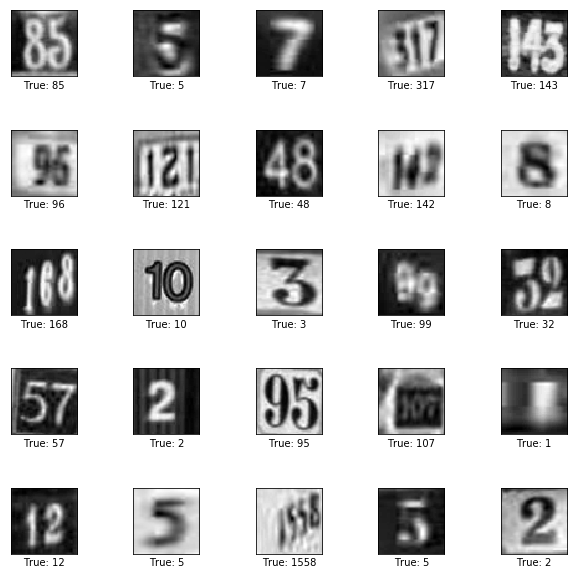

In [53]:
# Get the first images from the test-set.
images = train_images[0:25]

# Get the true classes for those images.
cls_true = train_labels[0:25]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [54]:
#print (optimize(num_iterations=100))
#print (a)

In [55]:
#saver.restore(session, "Model_saved/model_dig5_3_layer_lr5_100000")
#print_train_accuracy()

In [56]:
#print_test_accuracy()

## Results

In [57]:
error =[]
train_acc = []
test_acc =[]
iterations = 10000*np.ones(14,dtype=int)

for k in iterations:
    print (k)
    error.append(optimize(num_iterations=k))
    train_acc.append(print_train_accuracy())
    test_acc.append(print_test_accuracy())    

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


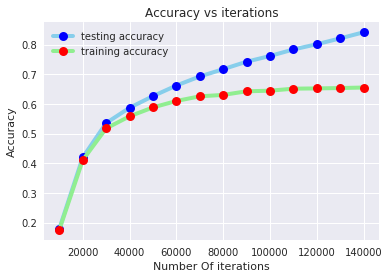

In [74]:
%matplotlib inline
import seaborn as sns
sns.set()
number_iterations = np.cumsum(iterations,dtype = int)
fig = plt.figure()
plt.plot( number_iterations, train_acc, marker='o', markerfacecolor='blue', markersize=9, color='skyblue', linewidth=4,label ="testing accuracy")
#plt.plot( number_iterations, train_acc, marker='', color='red', linewidth=4,label="training accuracy")
plt.plot( number_iterations,test_acc, marker='o', markerfacecolor='red', markersize=9, color='lightgreen', linewidth=4,label="training accuracy")
plt.title("Accuracy vs iterations")
plt.xlabel("Number Of iterations")
plt.ylabel("Accuracy")
plt.legend()
fig.savefig('accuracy.jpg')


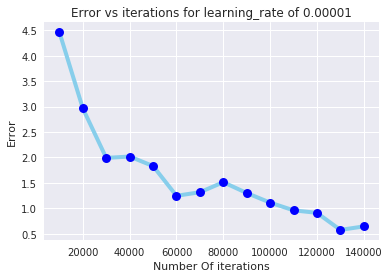

In [73]:
fig = plt.figure()
plt.plot( number_iterations, error,marker='o', markerfacecolor='blue', markersize=9, color='skyblue', linewidth=4)
plt.title("Error vs iterations for learning_rate of 0.00001")
plt.xlabel("Number Of iterations")
plt.ylabel("Error")
fig.savefig('error.jpg')